Importamos las librerias

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
# cargamos el dataset
train = pd.read_csv('/content/drive/My Drive/Python | Ciencia de Datos - Machine Learning/data-Titanic/train.csv')

In [122]:
# leemos los datos
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Validamos los datos

In [123]:
# Validamos valores NAN
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [124]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


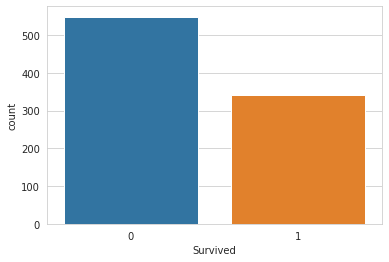

In [125]:
# vamso a ver quien sobrevivio y quien no ( no = 0, si = 1)
sns.countplot( x= 'Survived', data= train)

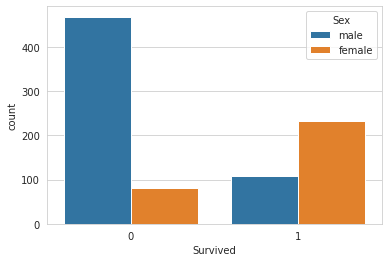

In [126]:
# Validaremos por sexo
sns.countplot( x= 'Survived', hue= 'Sex', data= train)


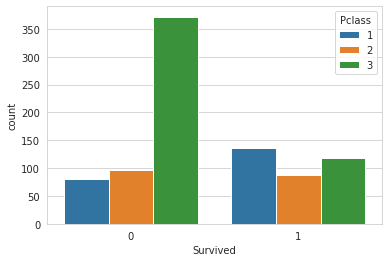

In [127]:
# validamos por clase de viaje
sns.countplot( x= 'Survived', hue= 'Pclass', data= train)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


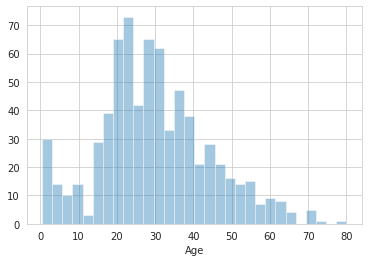

In [128]:
# distribucion por edad
sns.set_style('whitegrid')
sns.distplot(train['Age'].dropna(), kde= False, bins= 30) # kde 'se utiliza para visualizar la densidad de probabilidad de una variable continua'


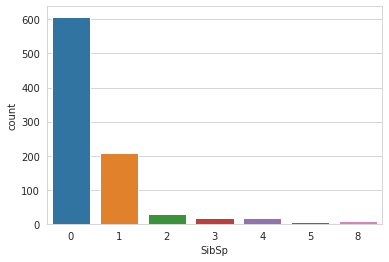

In [129]:
# ver numero de hermanos o conyuges ( acompañantes)
sns.countplot(x= 'SibSp', data= train)

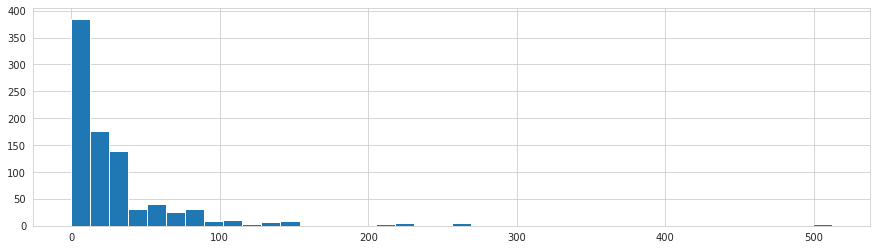

In [130]:
# ver cuanto pago cada uno
train['Fare'].hist(bins= 40, figsize= (15,4))

Limpiamos los datos

In [131]:
# Validamos valores NAN
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

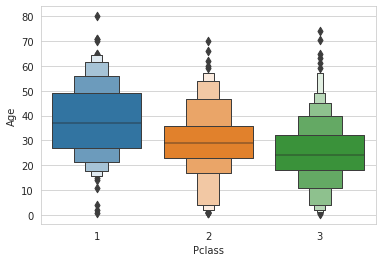

In [132]:
# vamos a estimar la edad para completar los valores NAN
sns.boxenplot(x= 'Pclass', y= 'Age', data= train)

In [133]:
# vamos a crear una funcion para imputar los rangos de edad segun la clase
# clase1 = 38, clase2 = 29, clase3 = 25
def imputar_edad(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isna(Age):
    if Pclass == 1:
      return 39
    elif Pclass == 2:
      return 29
    else:
      return 24
  else:
    return Age



In [134]:
train['Age'] = train[['Age', 'Pclass']].apply(imputar_edad, axis= 1)

In [135]:
# Validamos valores NAN en edad
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [136]:
# eliminamos la columna cabina ya que aparentemente no genera valor a la prediccion
train.drop('Cabin', axis= 1, inplace= True)

In [137]:
# Validamos valores NAN en edad y Valida eliminacion de cabina
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [138]:
# terminamos de eleimiar los valores NAN 
train.dropna(inplace= True)

In [139]:
# variables categoricas
# transformar -Sexo y Embarke
sex = pd.get_dummies(train['Sex'], drop_first= True)

In [140]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [141]:
embarked = pd.get_dummies(train['Embarked'], drop_first= True)

In [142]:
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [143]:
# vamso a concatenar con los datos de train por columnas
train = pd.concat([train,sex,embarked], axis=1)

In [144]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [145]:
# eliminamos las columnas que ya categorizamos y otras que no se van a usar
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace= True)

In [146]:
train.drop(['PassengerId'], axis=1, inplace= True)

In [147]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [148]:
# vamos a crear las vareiables X y eliminamos la columna Survived. axis=1 por que es una columna
X = train.drop('Survived', axis= 1)

In [149]:
# vamos a crear las vareiable y con 'Survived es la que se quiere predecir
y = train['Survived']

In [150]:
from sklearn.model_selection import train_test_split # nos ayuda a separa en test y train

In [151]:
# Separar en train y test
# test_size es el tamaño del conjunto de datos de para test
# train_test_split divide arreglos o matrices en subconjuntos aleatorios de train y test. 
# Eso significa que cada vez que lo ejecute sin especificar random_state, obtendrá un resultado diferente, este es el comportamiento esperado
# pero. Por otro lado, si usa random_state=un_valor_X, puede garantizar que la salida de la Ejecución 1 será igual a la salida de la Ejecución 2 
# es decir, su división será siempre la misma.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [152]:
from sklearn.linear_model import LogisticRegression # importamos el modelo de regresion logistica

In [153]:
logmodel = LogisticRegression() # instanciamos el modelo

In [154]:
# hacemos el fit, utilizar los datos de train
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [155]:
predicciones = logmodel.predict(X_test) # creamos las predicciones

In [156]:
predicciones

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1])

In [157]:
# metricas de clasificacion
from sklearn.metrics import classification_report

In [158]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       189
           1       0.75      0.68      0.71       105

    accuracy                           0.80       294
   macro avg       0.79      0.77      0.78       294
weighted avg       0.80      0.80      0.80       294



In [159]:
# matriz de confusion
from sklearn.metrics import confusion_matrix

In [160]:
confusion_matrix(y_test, predicciones)

array([[165,  24],
       [ 34,  71]])

In [179]:
test = pd.read_csv('/content/drive/My Drive/Python | Ciencia de Datos - Machine Learning/data-Titanic/test.csv')

In [180]:
# imputamos los datos de edad
test['Age'] = test[['Age', 'Pclass']].apply(imputar_edad, axis= 1)

In [181]:
# limpiamos datos en test
# eliminamos la columna cabina ya que aparentemente no genera valor a la prediccion
test.drop('Cabin', axis= 1, inplace= True)

In [182]:
# Sacamos al media en Fare para completar los datos faltantes 
test['Fare'].fillna(test['Fare'].mean(), inplace= True)

In [183]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [184]:
# variables categoricas
# transformar -Sexo y Embarke
sex = pd.get_dummies(test['Sex'], drop_first= True)
embarked = pd.get_dummies(test['Embarked'], drop_first= True)

In [185]:
# vamso a concatenar con los datos de test por columnas
entrega = pd.concat([test,sex,embarked], axis=1)

In [186]:
# eliminamos las columnas que ya categorizamos y otras que no se van a usar
entrega.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace= True)

In [187]:
passanger_id = entrega[['PassengerId']]

In [188]:
entrega.drop('PassengerId', axis=1, inplace=True)

In [191]:
predicciones = pd.DataFrame(logmodel.predict(entrega))

In [192]:
predicciones

,0
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [193]:
entrega_titanic = pd.concat([passanger_id,predicciones], axis=1)

In [194]:
entrega_titanic.head()

,PassengerId,0
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [195]:
entrega_titanic.columns = ['PassengerId', 'Survived']

In [196]:
entrega_titanic.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [197]:
entrega_titanic.to_csv('/content/drive/My Drive/Python | Ciencia de Datos - Machine Learning/data-Titanic/entrega.csv', index=False)